In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [40]:
# Set up file paths
os.chdir('/Users/nsusser/Desktop/Github/happyDB/')
# Load data 
input_path = 'analysis_data/results - factors.csv'
results = pd.read_csv(input_path)

In [41]:
# Create a mapping from Factor_# to human-readable names
factor_label_map = {
    "Factor_1": "Positive Emotions",
    "Factor_2": "Meaning and Mastery",
    "Factor_3": "Negative attitudes toward life",
    "Factor_4": "Close and Deep Relationships",
    "Factor_5": "Prosocial Behavior-Empathy for suffering",
    "Factor_6": "Engagement",
    "Factor_7": "Health",
    "Factor_8": "Autonomy",
    "Factor_9": "Vitality",
    "Factor_10": "Community & Belonging",
    "Factor_11": "Learning and Growth",
    "Factor_12": "Negative Emotions",
    "Factor_13": "Emotional Stability",
    "Factor_14": "Loneliness/Independence",
    "Factor_15": "Supportive Relationships",
    "Factor_16": "Autonomy-Engagement",
    "Factor_17": "Life Satisfaction",
    "Factor_18": "Trusting and Respectfully Relationships",
    "Factor_19": "Negative feelings toward self",
    "Factor_20": "Optimism",
    "Factor_21": "Resilience"
}

# Rename only the factor columns
results.rename(columns=factor_label_map, inplace=True)

factor_df = results.iloc[:, [1, 2] + list(range(-21, 0))]
factor_df.head()

,hmid,cleaned_hm,Positive Emotions,Meaning and Mastery,Negative attitudes toward life,Close and Deep Relationships,Prosocial Behavior-Empathy for suffering,Engagement,Health,Autonomy,...,Negative Emotions,Emotional Stability,Loneliness/Independence,Supportive Relationships,Autonomy-Engagement,Life Satisfaction,Trusting and Respectfully Relationships,Negative feelings toward self,Optimism,Resilience
0,27673,I went on a successful date with someone I fel...,0.339180,0.437745,-0.057690,0.906192,0.501828,0.427236,-0.311548,1.372047,...,1.284610,-0.089373,1.029016,1.396056,-0.237275,0.098863,1.209403,0.183206,-0.111082,0.445893
1,27674,I was happy when my son got 90% marks in his e...,0.989275,-0.205988,-0.429637,-0.328788,0.676607,-1.094066,-1.881865,-1.389394,...,-1.095274,-1.407321,-1.279183,1.814661,1.024059,1.517577,-1.111301,0.280118,-0.866203,-0.748348
2,27675,I went to the gym this morning and did yoga.,-1.279310,0.998694,-0.609427,-0.813609,-0.415163,0.047907,1.849796,0.115974,...,-0.322062,0.012990,0.293794,-0.420337,0.890426,0.626990,-0.094256,0.785793,-0.443137,-0.225095
3,27676,We had a serious talk with some friends of our...,0.334278,0.488914,1.891157,1.679246,1.546247,-1.023636,0.015420,1.892245,...,0.090196,0.747293,1.300113,-0.928223,1.290432,-1.758531,-0.576696,-2.800375,-1.102448,-0.246136
4,27677,I went with grandchildren to butterfly display...,-0.123233,-0.247800,-1.088872,0.598722,0.125059,1.170942,1.178237,-0.722430,...,0.266192,0.358138,-0.620239,-0.017194,-0.438795,0.172262,-1.581941,-0.407391,0.246818,-0.509145


In [42]:
threshold = 0.8
filtered_sentences = {factor: factor_df.loc[factor_df[factor] > threshold, ['hmid', 'cleaned_hm']] for factor in factor_df.columns[2:]}
filtered_sentences.keys()

dict_keys(['Positive Emotions', 'Meaning and Mastery', 'Negative attitudes toward life', 'Close and Deep Relationships', 'Prosocial Behavior-Empathy for suffering', 'Engagement', 'Health', 'Autonomy', 'Vitality', 'Community & Belonging', 'Learning and Growth', 'Negative Emotions', 'Emotional Stability', 'Loneliness/Independence', 'Supportive Relationships', 'Autonomy-Engagement', 'Life Satisfaction', 'Trusting and Respectfully Relationships', 'Negative feelings toward self', 'Optimism', 'Resilience'])

In [43]:
factor_counts = {factor: len(filtered_sentences[factor]) for factor in filtered_sentences}
factor_counts

{'Positive Emotions': 15439,
 'Meaning and Mastery': 24179,
 'Negative attitudes toward life': 16210,
 'Close and Deep Relationships': 25419,
 'Prosocial Behavior-Empathy for suffering': 10206,
 'Engagement': 21804,
 'Health': 18912,
 'Autonomy': 21256,
 'Vitality': 19632,
 'Community & Belonging': 18286,
 'Learning and Growth': 17582,
 'Negative Emotions': 13052,
 'Emotional Stability': 17749,
 'Loneliness/Independence': 16246,
 'Supportive Relationships': 17030,
 'Autonomy-Engagement': 16735,
 'Life Satisfaction': 18130,
 'Trusting and Respectfully Relationships': 18224,
 'Negative feelings toward self': 11334,
 'Optimism': 18264,
 'Resilience': 16485}

In [44]:
sentences = pd.read_csv('dataframes/clean_sentences.csv')
sentences.head()


,hmid,reflection_period,cleaned_hm
0,27673,24h,I went on a successful date with someone I fel...
1,27674,24h,I was happy when my son got 90% marks in his e...
2,27675,24h,I went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...


In [45]:
# Merge factor data with sentences on 'hmid' to include 'reflection_period'
merged_df = factor_df.merge(sentences[['hmid', 'reflection_period']], on='hmid', how='inner')

# Z-score factor columns (excluding 'hmid' and 'cleaned_hm')
factor_columns = factor_df.columns[2:]  # Assuming first two columns are 'hmid' and 'cleaned_hm'
merged_df[factor_columns] = merged_df[factor_columns].apply(zscore, axis=0)


# Initialize dictionary to store normalized counts by factor and reflection period
factor_percentages_by_period = {}
factor_counts_by_period = {}

# Get total number of sentences per reflection period
total_sentences_per_period = merged_df['reflection_period'].value_counts().to_dict()

# Loop through each factor and compute normalized percentages
for factor in factor_df.columns[2:]:  # Skip 'hmid' and 'cleaned_hm'
    filtered_df = merged_df[merged_df[factor] >= .8]  # Apply threshold

    # Count occurrences per reflection period
    counts = filtered_df.groupby('reflection_period').size().to_dict()
    
    # Normalize by total sentences per period
    percentages = {period: (counts.get(period, 0) / total_sentences_per_period[period]) * 100 
                   for period in total_sentences_per_period}
    
    #store counts in dictionary
    factor_counts_by_period[factor] = counts
    
    # Store result in dictionary
    factor_percentages_by_period[factor] = percentages

# Print the results
factor_percentages_by_period


{'Positive Emotions': {'3m': 18.830374753451675, '24h': 12.435524335173106},
 'Meaning and Mastery': {'3m': 27.57790927021696, '24h': 20.820873055694932},
 'Negative attitudes toward life': {'3m': 17.497041420118343,
  '24h': 15.175112895132967},
 'Close and Deep Relationships': {'3m': 26.2465483234714,
  '24h': 24.836929252383342},
 'Prosocial Behavior-Empathy for suffering': {'3m': 11.36094674556213,
  '24h': 10.007024586051179},
 'Engagement': {'3m': 22.615384615384613, '24h': 23.102860010035123},
 'Health': {'3m': 18.550295857988168, '24h': 21.67185148018063},
 'Autonomy': {'3m': 23.96844181459566, '24h': 21.627696939287507},
 'Vitality': {'3m': 20.664694280078898, '24h': 21.455092824887103},
 'Community & Belonging': {'3m': 23.157790927021697,
  '24h': 17.336678374310086},
 'Learning and Growth': {'3m': 21.244575936883628, '24h': 16.80481685900652},
 'Negative Emotions': {'3m': 15.91518737672584, '24h': 12.660311088810838},
 'Emotional Stability': {'3m': 17.842209072978303, '24h':

In [46]:
per = pd.DataFrame(factor_percentages_by_period).T
print(per)

                                                 3m        24h
Positive Emotions                         18.830375  12.435524
Meaning and Mastery                       27.577909  20.820873
Negative attitudes toward life            17.497041  15.175113
Close and Deep Relationships              26.246548  24.836929
Prosocial Behavior-Empathy for suffering  11.360947  10.007025
Engagement                                22.615385  23.102860
Health                                    18.550296  21.671851
Autonomy                                  23.968442  21.627697
Vitality                                  20.664694  21.455093
Community & Belonging                     23.157791  17.336678
Learning and Growth                       21.244576  16.804817
Negative Emotions                         15.915187  12.660311
Emotional Stability                       17.842209  23.092825
Loneliness/Independence                   18.822485  19.861515
Supportive Relationships                  20.055227  17

In [47]:
counts = pd.DataFrame(factor_counts_by_period).T
print(counts)
counts.to_csv('analysis_data/factor_counts_by_period.csv')

                                            24h     3m
Positive Emotions                          6196   9547
Meaning and Mastery                       10374  13982
Negative attitudes toward life             7561   8871
Close and Deep Relationships              12375  13307
Prosocial Behavior-Empathy for suffering   4986   5760
Engagement                                11511  11466
Health                                    10798   9405
Autonomy                                  10776  12152
Vitality                                  10690  10477
Community & Belonging                      8638  11741
Learning and Growth                        8373  10771
Negative Emotions                          6308   8069
Emotional Stability                       11506   9046
Loneliness/Independence                    9896   9543
Supportive Relationships                   8712  10168
Autonomy-Engagement                       10120   9761
Life Satisfaction                          9685  10468
Trusting a

stopwords_map = {'Positive Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally got',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Meaning and Mastery': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got good',
  'got job',
  'got new',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really good',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative attitudes toward life': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'day school',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'friend haven',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'memorable day',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really felt',
  'really happy',
  'school friend',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Close, loving relationships': {'24 hours',
  'best friend',
  'came visit',
  'day life',
  'extremely happy',
  'family members',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'high school',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'old friend',
  'past 24',
  'past months',
  'really happy',
  'time family',
  'weeks ago',
  'year old'},
 'Prosocial Behavior-Empathy for suffering': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy happy',
  'happy moment',
  'happy past',
  'happy seeing',
  'happy time',
  'long time',
  'make happy',
  'make roti',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'rs 3000',
  'weeks ago',
  'year old'},
 'Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Health': {'24 hours',
  'able sleep',
  'bike ride',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got home',
  'got sleep',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'long walk',
  'makes happy',
  'moment life',
  'months ago',
  'night sleep',
  'past 24',
  'past months',
  'really happy',
  'took dog',
  'weeks ago',
  'went gym',
  'year old'},
 'Autonomy': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'purchased new',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went dinner',
  'went movie',
  'went shopping',
  'year old'},
 'Vitality': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'colleagues great',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'offsite colleagues',
  'past 24',
  'past months',
  'presented new',
  'really happy',
  'spent time',
  'surprise given',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Community & Belonging': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got accepted',
  'got job',
  'got married',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new house',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'team won',
  'video game',
  'weeks ago',
  'went shopping',
  'won game',
  'year old'},
 'Learning and Growth': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'fun stimulating',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'stimulating discussions',
  'tried new',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'exam time',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'job interview',
  'job offer',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'moved new',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'romantic date',
  'seen years',
  'spent time',
  'video game',
  'weeks ago',
  'went date',
  'went shopping',
  'year old'},
 'Emotional Stability': {'24 hours',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'good time',
  'got work',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'really nice',
  'weeks ago',
  'work today',
  'year old'},
 'Loneliness/Independence': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'friend hadn',
  'friend haven',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'met old',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'seen long',
  'seen long time',
  'seen years',
  'weeks ago',
  'year old'},
 'Relationships-Support': {'24 hours',
  'daughter',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'happy son',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'mother day',
  'old son',
  'past 24',
  'past months',
  'really happy',
  'son got',
  'weeks ago',
  'year old'},
 'Autonomy-Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Life Satisfaction': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'went temple',
  'year old'},
 'Relationships-Trust and Respect': {'24 hours',
  'big hug',
  'bonus work',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got free',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really happy',
  'weeks ago',
  'year old'},
 'Negative feelings toward self': {'24 hours',
  'able pay',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'finally passed',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lost pounds',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Optimism': {'24 hours',
  'baby girl',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'gave birth',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'looking forward',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Resilience': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'event happy past',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'}}

In [50]:
# First, create a dataframe with only the factor columns
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
dominant_factor_indices = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
dominant_factor_values = factors_only_df.max(axis=1)      # Highest factor value per sentence

# Add these to the original dataframe
factor_df['dominant_factor'] = dominant_factor_indices
factor_df['factor_strength'] = dominant_factor_values

# Print a preview
print("Dominant Factor Shape:", factor_df['dominant_factor'].shape)
print("Factor Strength Shape:", factor_df['factor_strength'].shape)
print(factor_df[['dominant_factor', 'factor_strength']].head())

Dominant Factor Shape: (100525,)
Factor Strength Shape: (100525,)
            dominant_factor  factor_strength
0  Supportive Relationships         1.396056
1  Supportive Relationships         1.814661
2                    Health         1.849796
3                  Autonomy         1.892245
4                    Health         1.178237


/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_22876/2353126735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = dominant_factor_indices
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_22876/2353126735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = dominant_factor_values


In [71]:


universal_stopwords = {
    "with my", "in the", "made me", "it was", "went to", "able to", "of my", "me happy", "in my", "for the",
    "of the", "very happy", "to the", "made me happy", "to my", "on the", "and it", "was able", "was able to",
    "to see", "for my", "one of", "at the", "got to", "the first", "my son", "was happy", "my life",
    "was very",  "on my", "and we", "was so happy", "to be happy", "to be able", "was so happy", "was so", "was very happy",
    "and was", "to be", "happy to", "happy when",  "first time", "that made", "to get",
    "the first time", "the day", "going to", "to go", "that made me", "for the first", "at work", "last night",
    "for me", "me and", "and the", "that was", "and my", "we had", "found out",
    "so happy", "it made", "to me", "when my",  "me to", "was so", 
    "and had", "it made me", "long time",  "this morning", "told me", "was happy when",
    "have been",  "lot of", "had been", "the past", "from my", "time with",
    "to do", "she was", "in my life", "bought new", "and she", "one of my",
    "and it was", "event that",  "makes me", "at my",  "time in",
    "out of", "happiest moment", "gave me", "that my", "it is", "to temple",
    "went for", "seen in", "went out", "woke up", "out to", "an old", 
    "year old", "that had", "event that made", "with her",  "me feel",
    "to help",  "have to", "how to", "went on", "went to the", "out that", "talked to", 
    "go to", "and got",  "with me", "see my",  "he was", "haven seen",
    "after long", "of my favorite", "and he","i", "my", "was", "to", "the", "a", "is", "in", "of", "for", "that", "it", "on",
    "with", "and", "at", "as", "by", "an", "be", "this", "wasn't", "we", "so", "from",
    "there", "but", "what", "who", "when", "where", "which", "if", "then", "they", "them",
    "their", "these", "those", "he", "she", "my", "you", "your", "his", "her", "its",
    "our", "its", "me", "us", "him", "her", "them", "that", "these", "those",
    "such", "more", "most", "some", "any", "no", "none", "all", "both", "few",
    "many", "much", "little", "less", "least", "other", "another", "same", "same as",
    "different", "different from", "same as", "like", "unlike", "similar", "opposite",
    "same", "different", "more than", "less than", "greater than", "smaller than",
    "better than", "worse than", "equal to", "not equal to", "between", "among",
    "before", "after", "during", "while", "until", "since", "for", "ago", "about",
    "around", "through", "across", "along", "with", "without", "within", "outside",
    "above", "below", "under", "over", "between", "among", "against", "toward",
    "towards", "alongside", "beside", "next to", "near", "far", "close to",
    "away from", "toward", "towards", "against", "alongside", "beside", "next to",
    "near", "far", "close to", "away from", "toward", "towards", "against",
    "alongside", "beside", "next to", "near", "far", "close to", "away from",
    "toward", "towards", "against", "alongside", "beside", "next to", "near",
    "far", "close to", "away from", "toward", "towards", "against", "alongside",
    "beside", "next to", "near", "far", "close to", "away from", "toward", "got",
    "made", "time", "happy", "had", "see", "want", "go", "know", "think", "feel",
    "say", "tell", "give", "take", "make", "do", "have", "be", "is", "are",
    "was", "were", "will", "would", "can", "could", "should", "may", "might",
    "must", "shall", "ought", "need", "want", "like", "love", "hate", "prefer","have",
    "day", "s", "S", "time", "thing", "things", "one", "two", "three", "four", "five", "went", 
    "out", "00am", "rs", "ai", "bhk", "unfortunately", 
}


In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import math

# Function to clean text by removing special characters and converting to lowercase
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Generate a word cloud from text data
def generate_word_cloud(text_data, title=None, stopwords=None, colormap='viridis', 
                        max_words=100, width=800, height=500):
    """
    Generate a word cloud from text data.
    """
    # If stopwords is None, create an empty set
    if stopwords is None:
        stopwords = set()
    
    # Create the word cloud
    wc = WordCloud(
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        colormap=colormap,
        stopwords=stopwords,
        random_state=42,
        collocations=False,
        prefer_horizontal=0.9,
        min_font_size=8
    )
    
    # Generate word cloud based on input type
    if isinstance(text_data, dict) and text_data:  # Check if dictionary is not empty
        try:
            wc.generate_from_frequencies(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your stopwords filter.")
            # Return a blank word cloud object
            return None
    elif isinstance(text_data, str) and text_data.strip():  # Check if string is not empty
        try:
            wc.generate(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your text data.")
            return None
    else:
        print(f"No valid data for word cloud: {title}")
        return None
    
    # Create the figure and plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    if title:
        plt.title(title, fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    return wc

# Create a word cloud from word frequencies
def create_frequency_word_cloud(word_freq_dict, title="Word Frequency Cloud", stopwords=None, colormap='plasma'):
    """
    Create a word cloud from a dictionary of word frequencies
    """
    if not word_freq_dict:
        print("Word frequency dictionary is empty")
        return None
    
    # Filter out stopwords if provided
    if stopwords:
        word_freq_dict = {word: freq for word, freq in word_freq_dict.items() 
                         if word.lower() not in stopwords}
    
    if not word_freq_dict:
        print("No words left after stopword filtering")
        return None
    
    # Generate the word cloud
    return generate_word_cloud(word_freq_dict, title=title, colormap=colormap)

# Calculate word frequencies for each factor
def calculate_factor_word_frequencies(df, text_column='cleaned_hm', 
                                      factor_column='dominant_factor',
                                      strength_column='factor_strength',
                                      strength_threshold=0.0,
                                      stopwords=None):
    """
    Calculate word frequencies for each factor using only the sentences 
    where that factor is dominant.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    stopwords : set or None
        Set of words to exclude from the frequency counts
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    """
    if stopwords is None:
        stopwords = set()
    
    # Create a dictionary to store word frequencies for each factor
    factor_word_frequencies = {}
    
    # Get unique factors in the dataset
    unique_factors = df[factor_column].unique()
    
    for factor in unique_factors:
        # Filter rows where this factor is dominant and above threshold
        factor_texts = df[(df[factor_column] == factor) & 
                          (df[strength_column] > strength_threshold)][text_column].dropna()
        
        if factor_texts.empty:
            print(f"No texts found for factor '{factor}' with threshold {strength_threshold}")
            continue
            
        # Clean and tokenize the texts
        all_words = []
        for text in factor_texts:
            if isinstance(text, str):
                # Clean the text
                cleaned_text = clean_text(text)
                # Split into words
                words = cleaned_text.split()
                # Remove stopwords
                words = [word for word in words if word.lower() not in stopwords and len(word) > 1]
                all_words.extend(words)
        
        # Count word frequencies
        word_counts = Counter(all_words)
        
        # Store in the dictionary
        factor_word_frequencies[factor] = dict(word_counts)
    
    return factor_word_frequencies

# Calculate balanced importance scores for words in each factor
def calculate_word_importance_scores(factor_word_frequencies, min_term_freq=3, sublinear_tf=True, idf_smoothing=1.0):
    """
    Calculate importance scores for words in each factor using a balanced TF-IDF style approach.
    
    Parameters:
    -----------
    factor_word_frequencies : dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    """
    # Count how many factors each word appears in
    word_factor_counts = {}
    all_factors = list(factor_word_frequencies.keys())
    n_factors = len(all_factors)
    
    # Count total words per factor for TF calculation
    factor_total_words = {}
    
    # Get global word counts for reference
    global_word_counts = {}
    
    for factor, word_freqs in factor_word_frequencies.items():
        factor_total_words[factor] = sum(word_freqs.values())
        
        for word, freq in word_freqs.items():
            # Update factor count for this word
            if word not in word_factor_counts:
                word_factor_counts[word] = 0
            word_factor_counts[word] += 1
            
            # Update global word count
            if word not in global_word_counts:
                global_word_counts[word] = 0
            global_word_counts[word] += freq
    
    # Calculate importance scores for each word in each factor
    word_importance_scores = {}
    
    for factor in all_factors:
        word_importance_scores[factor] = {}
        
        if factor not in factor_word_frequencies:
            continue
            
        word_freqs = factor_word_frequencies[factor]
        
        for word, freq in word_freqs.items():
            # Skip words that don't meet minimum term frequency
            if freq < min_term_freq:
                continue
                
            # Term Frequency (TF) with optional sublinear scaling
            if sublinear_tf:
                # Add 1 before taking log to avoid log(1) = 0
                tf = 1 + math.log(freq)
            else:
                tf = freq / factor_total_words[factor]
            
            # Inverse Document Frequency (IDF) with smoothing
            # Smoothing reduces the impact of very rare words
            idf = math.log((n_factors + idf_smoothing) / (word_factor_counts[word] + idf_smoothing))
            
            # TF-IDF score
            tfidf = tf * idf
            
            # Adjust score based on global frequency to further reduce bias towards rare words
            # This multiplies by the square root of the global frequency to give some boost to common words
            adjusted_score = tfidf * math.sqrt(global_word_counts[word] / sum(global_word_counts.values()))
            
            word_importance_scores[factor][word] = adjusted_score
    
    return word_importance_scores

# Visualize word importance scores for each factor
def visualize_word_importance(word_importance_scores, factors_to_visualize=None, 
                            top_n=20, stopwords=None, colormap='viridis'):
    """
    Create word clouds and print top words based on importance scores for each factor.
    
    Parameters:
    -----------
    word_importance_scores : dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Additional stopwords to filter out
    colormap : str
        Matplotlib colormap to use for the word cloud
    """
    # If no factors specified, use all factors
    if factors_to_visualize is None:
        factors_to_visualize = list(word_importance_scores.keys())
    
    for factor in factors_to_visualize:
        if factor not in word_importance_scores:
            print(f"Factor '{factor}' not found in the word importance scores dictionary")
            continue
            
        word_scores = word_importance_scores[factor]
        
        if not word_scores:
            print(f"No word importance scores found for factor '{factor}'")
            continue
        
        # Sort by importance score and take top N words
        sorted_word_scores = dict(sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
        
        # Create word cloud
        create_frequency_word_cloud(
            sorted_word_scores, 
            title=f"Top {top_n} Distinctive Words for {factor}",
            stopwords=stopwords,
            colormap=colormap
        )
        
        # Also print the top words and their importance scores
        print(f"\nTop {top_n} distinctive words for {factor}:")
        for word, score in sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]:
            print(f"{word}: {score:.6f}")

# Complete analysis pipeline function
def analyze_factor_word_importance(df, text_column='cleaned_hm', 
                                 factor_column='dominant_factor',
                                 strength_column='factor_strength',
                                 strength_threshold=0.5,
                                 factors_to_visualize=None, 
                                 top_n=20,
                                 stopwords=None,
                                 colormap='viridis',
                                 min_term_freq=3,
                                 sublinear_tf=True,
                                 idf_smoothing=1.0):
    """
    Complete pipeline to analyze and visualize distinctive words for each factor.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Set of words to exclude from the frequency counts
    colormap : str
        Matplotlib colormap to use for the word cloud
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    tuple
        (factor_word_frequencies, word_importance_scores) - dictionaries with the 
        raw word frequencies and calculated importance scores
    """
    print("Calculating word frequencies for each factor...")
    # Step 1: Calculate word frequencies for each factor
    factor_word_frequencies = calculate_factor_word_frequencies(
        df, 
        text_column=text_column,
        factor_column=factor_column,
        strength_column=strength_column,
        strength_threshold=strength_threshold,
        stopwords=stopwords
    )
    
    print("Calculating word importance scores...")
    # Step 2: Calculate word importance scores using balanced TF-IDF approach
    word_importance_scores = calculate_word_importance_scores(
        factor_word_frequencies,
        min_term_freq=min_term_freq,
        sublinear_tf=sublinear_tf,
        idf_smoothing=idf_smoothing
    )
    
    print("Visualizing distinctive words for each factor...")
    # Step 3: Visualize the results
    visualize_word_importance(
        word_importance_scores,
        factors_to_visualize=factors_to_visualize,
        top_n=top_n,
        stopwords=stopwords,
        colormap=colormap
    )
    
    return factor_word_frequencies, word_importance_scores

# Example usage:
# First, ensure you have calculated dominant factors for your dataframe:
# 
# # Create a dataframe with only the factor columns
# factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
# factors_only_df = factor_df[factor_columns]
# 
# # Get dominant factor index (highest score per sentence)
# factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
# factor_df['factor_strength'] = factors_only_df.max(axis=1)     # Highest factor value per sentence
# 
# # Then, run the complete analysis pipeline:
# freq_dict, importance_dict = analyze_factor_word_importance(
#     factor_df, 
#     text_column='cleaned_hm',
#     factor_column='dominant_factor',
#     strength_column='factor_strength',
#     strength_threshold=0.5,
#     factors_to_visualize=["Positive Emotions", "Close and Deep Relationships"],
#     top_n=20,
#     stopwords=universal_stopwords
# )

/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_22876/842685458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_22876/842685458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = factors_only_df.max(axis=1)


Calculating word frequencies for each factor...
Calculating word importance scores...
Visualizing distinctive words for each factor...


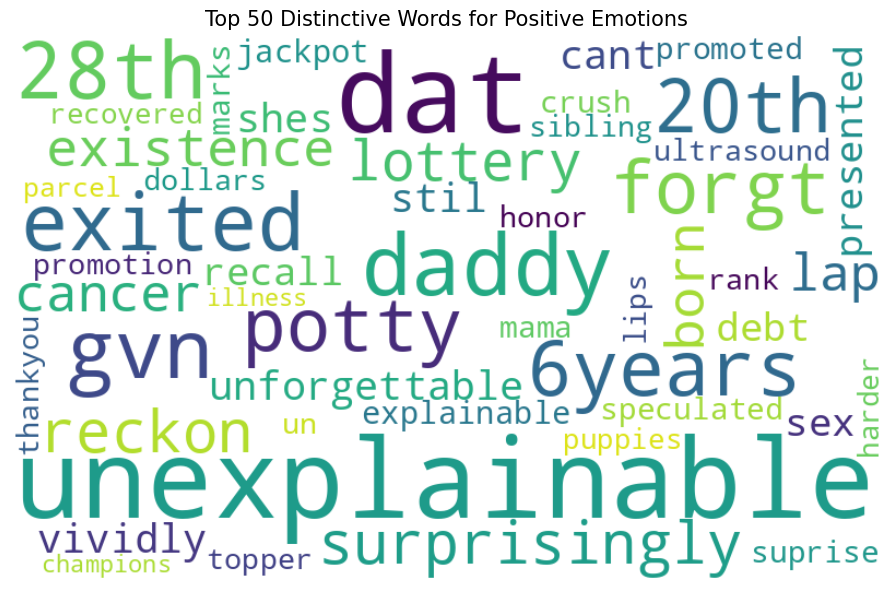


Top 50 distinctive words for Positive Emotions:
unexplainable: 0.060936
dat: 0.060283
daddy: 0.032872
gvn: 0.031360
28th: 0.029504
exited: 0.029002
6years: 0.027397
20th: 0.025588
forgt: 0.024917
potty: 0.024889
surprisingly: 0.023202
reckon: 0.022822
lottery: 0.020543
existence: 0.019212
born: 0.018851
cancer: 0.017866
lap: 0.017400
unforgettable: 0.016823
vividly: 0.016806
shes: 0.016506
cant: 0.016496
stil: 0.016304
debt: 0.015491
presented: 0.015430
sex: 0.015371
recall: 0.015051
explainable: 0.014902
jackpot: 0.014710
speculated: 0.014170
crush: 0.013990
promoted: 0.013905
suprise: 0.013820
marks: 0.013599
mama: 0.013433
promotion: 0.013321
honor: 0.013252
ultrasound: 0.013050
sibling: 0.012945
thankyou: 0.012617
topper: 0.012560
dollars: 0.012542
un: 0.012538
rank: 0.012533
lips: 0.012487
puppies: 0.012409
recovered: 0.012338
harder: 0.012289
parcel: 0.011782
champions: 0.011643
illness: 0.011616


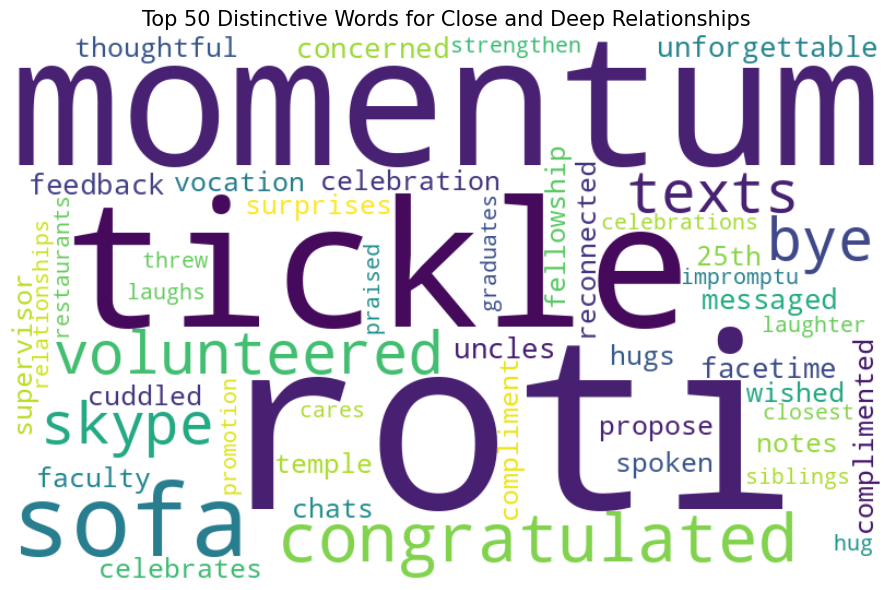


Top 50 distinctive words for Close and Deep Relationships:
roti: 0.078242
momentum: 0.052645
tickle: 0.048707
sofa: 0.029060
congratulated: 0.028710
volunteered: 0.027620
bye: 0.027431
texts: 0.026343
skype: 0.025982
unforgettable: 0.025950
uncles: 0.025877
messaged: 0.025852
feedback: 0.025125
facetime: 0.025016
concerned: 0.024807
hugs: 0.022851
celebration: 0.022712
thoughtful: 0.022684
complimented: 0.022466
cuddled: 0.022126
celebrates: 0.022061
notes: 0.021792
25th: 0.021680
spoken: 0.021503
temple: 0.021065
chats: 0.020777
faculty: 0.020689
fellowship: 0.020623
supervisor: 0.020472
surprises: 0.020427
propose: 0.020348
reconnected: 0.020253
vocation: 0.019994
wished: 0.019982
compliment: 0.019612
strengthen: 0.019584
laughter: 0.019290
impromptu: 0.019143
siblings: 0.019047
laughs: 0.018901
celebrations: 0.018712
hug: 0.018685
threw: 0.018519
relationships: 0.018090
praised: 0.018015
cares: 0.018015
graduates: 0.017985
promotion: 0.017616
closest: 0.017601
restaurants: 0.017596

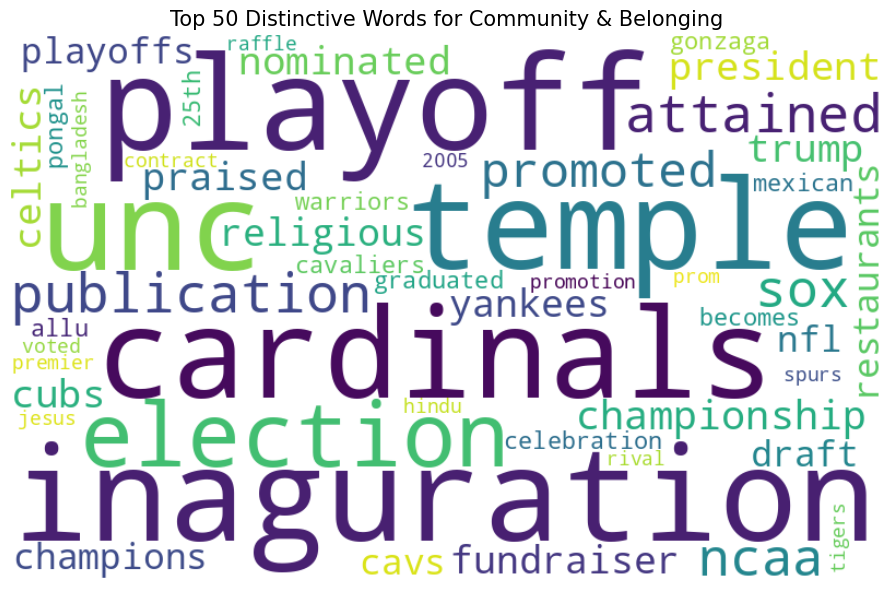


Top 50 distinctive words for Community & Belonging:
inaguration: 0.031360
playoff: 0.031191
cardinals: 0.028792
temple: 0.028085
unc: 0.027760
election: 0.026433
publication: 0.026366
attained: 0.024880
sox: 0.024083
ncaa: 0.023673
promoted: 0.023620
championship: 0.022678
trump: 0.021563
nominated: 0.021264
celtics: 0.020936
cubs: 0.020573
praised: 0.020485
president: 0.020266
religious: 0.020218
fundraiser: 0.020087
yankees: 0.019863
champions: 0.019778
nfl: 0.019720
cavs: 0.019616
playoffs: 0.019600
draft: 0.019212
restaurants: 0.019202
graduated: 0.019122
celebration: 0.018928
pongal: 0.018847
gonzaga: 0.018555
warriors: 0.018460
mexican: 0.018414
becomes: 0.018399
25th: 0.018327
cavaliers: 0.018325
allu: 0.018078
promotion: 0.018013
prom: 0.017996
hindu: 0.017924
voted: 0.017904
2005: 0.017859
raffle: 0.017445
contract: 0.017428
spurs: 0.017065
premier: 0.017049
bangladesh: 0.017044
tigers: 0.016976
jesus: 0.016959
rival: 0.016354


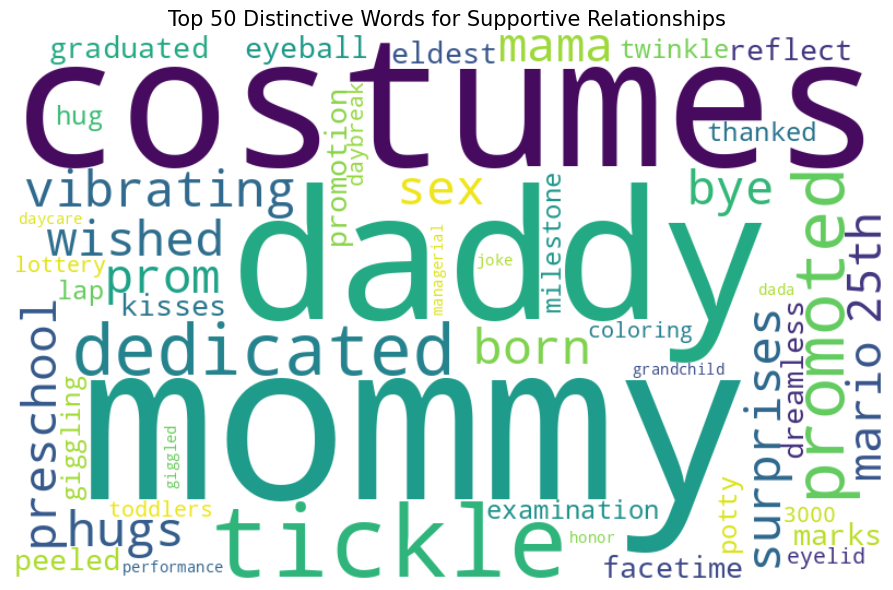


Top 50 distinctive words for Supportive Relationships:
mommy: 0.035238
costumes: 0.028100
daddy: 0.027874
tickle: 0.024412
dedicated: 0.024061
promoted: 0.023090
vibrating: 0.022849
surprises: 0.021838
wished: 0.021570
born: 0.021536
sex: 0.021273
hugs: 0.021082
prom: 0.020610
bye: 0.020147
mama: 0.020028
preschool: 0.019522
25th: 0.019338
mario: 0.019085
graduated: 0.018700
reflect: 0.018424
facetime: 0.018311
promotion: 0.018257
eldest: 0.018243
peeled: 0.017985
kisses: 0.017936
dreamless: 0.017764
eyeball: 0.017764
marks: 0.017401
examination: 0.017287
giggling: 0.017085
twinkle: 0.017044
thanked: 0.016918
milestone: 0.016862
potty: 0.016802
hug: 0.016739
lap: 0.016728
coloring: 0.016462
toddlers: 0.016393
3000: 0.015972
daybreak: 0.015943
eyelid: 0.015943
lottery: 0.015482
performance: 0.015362
joke: 0.015288
grandchild: 0.015273
managerial: 0.015267
honor: 0.015195
giggled: 0.015132
daycare: 0.015106
dada: 0.015101


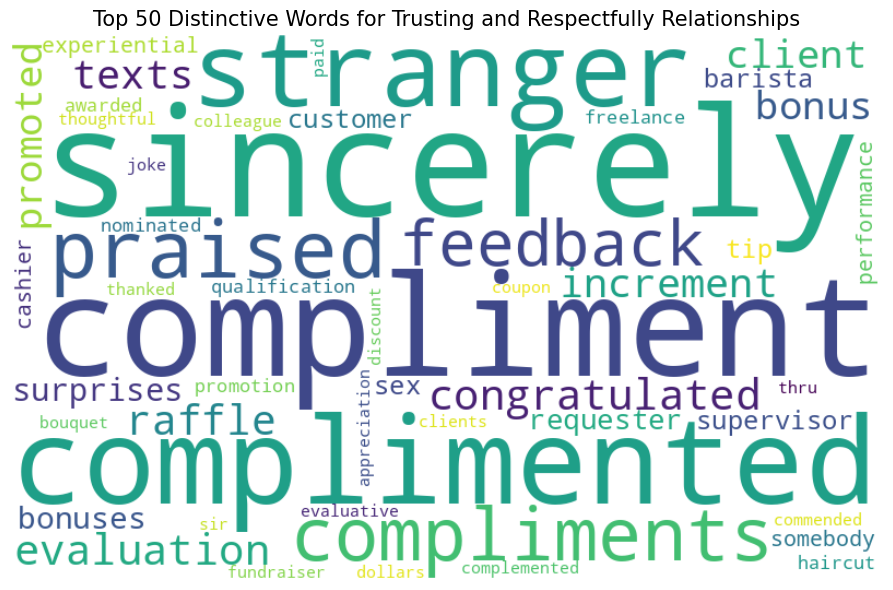


Top 50 distinctive words for Trusting and Respectfully Relationships:
sincerely: 0.048793
compliment: 0.041742
complimented: 0.040657
stranger: 0.039316
praised: 0.038856
compliments: 0.037421
feedback: 0.035982
congratulated: 0.031766
evaluation: 0.031396
raffle: 0.029908
texts: 0.027901
increment: 0.027693
client: 0.026929
promoted: 0.026474
bonus: 0.025928
surprises: 0.024889
bonuses: 0.023903
requester: 0.023850
supervisor: 0.023265
tip: 0.023075
sex: 0.022962
barista: 0.022822
customer: 0.022000
experiential: 0.021942
somebody: 0.021638
cashier: 0.021586
performance: 0.021418
qualification: 0.020425
freelance: 0.019385
awarded: 0.019154
promotion: 0.019110
nominated: 0.018790
haircut: 0.018711
complemented: 0.018622
bouquet: 0.018455
evaluative: 0.018365
thru: 0.018310
coupon: 0.018243
sir: 0.018052
thanked: 0.017351
joke: 0.016840
dollars: 0.016779
paid: 0.016756
thoughtful: 0.016521
appreciation: 0.016514
commended: 0.016333
fundraiser: 0.016155
discount: 0.015887
clients: 0.01

In [72]:
# First, calculate dominant factors for your dataframe
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
factor_df['factor_strength'] = factors_only_df.max(axis=1)

# Run the analysis with balanced word importance calculation
freq_dict, importance_dict = analyze_factor_word_importance(
    factor_df, 
    text_column='cleaned_hm',
    factor_column='dominant_factor',
    strength_column='factor_strength',
    strength_threshold=0.5,
    factors_to_visualize=[
        "Positive Emotions", 
        "Close and Deep Relationships", 
        "Community & Belonging", 
        "Supportive Relationships", 
        "Trusting and Respectfully Relationships"
    ],
    top_n=50,
    stopwords=universal_stopwords,
    min_term_freq=3,       # Words must appear at least 3 times in a factor
    sublinear_tf=True,     # Use logarithmic scaling for term frequency
    idf_smoothing=1.0      # Smoothing factor for IDF calculation
)